In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [2]:
pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python streamlit scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Libraries
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Flatten
from PIL import Image 
import cv2

In [4]:
# Define image size
img_size = (224, 224)

# Define directories for training and validation datasets
train_dir = r"C:\Users\balaj\OneDrive\Documents\Guvi_Projects\Multi_Class_Image_Classification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir = r"C:\Users\balaj\OneDrive\Documents\Guvi_Projects\Multi_Class_Image_Classification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=64,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


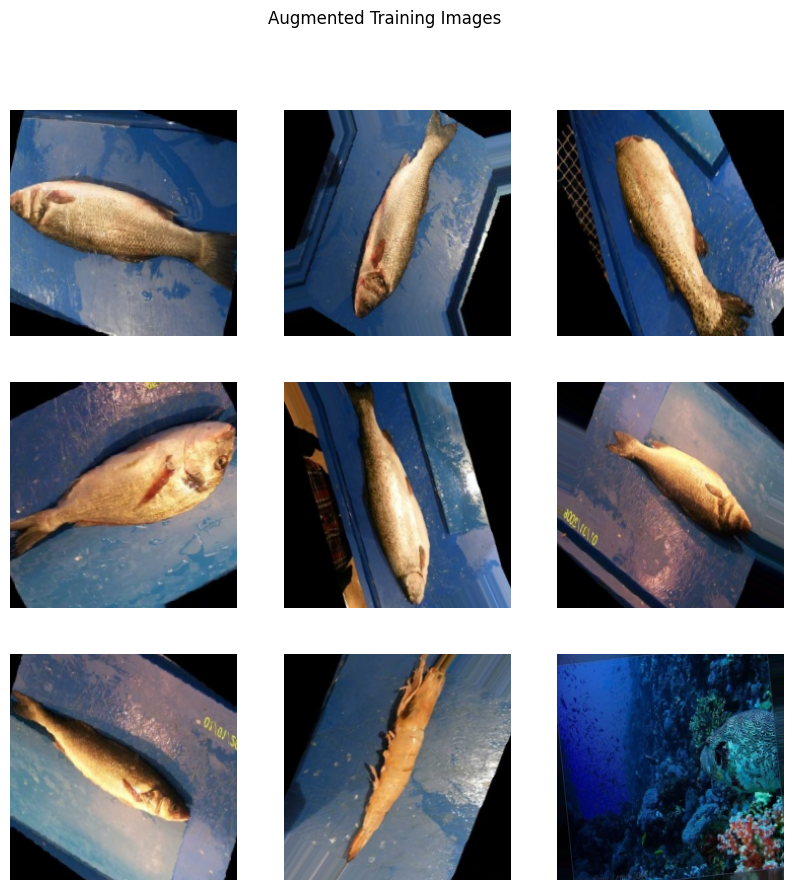

In [5]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

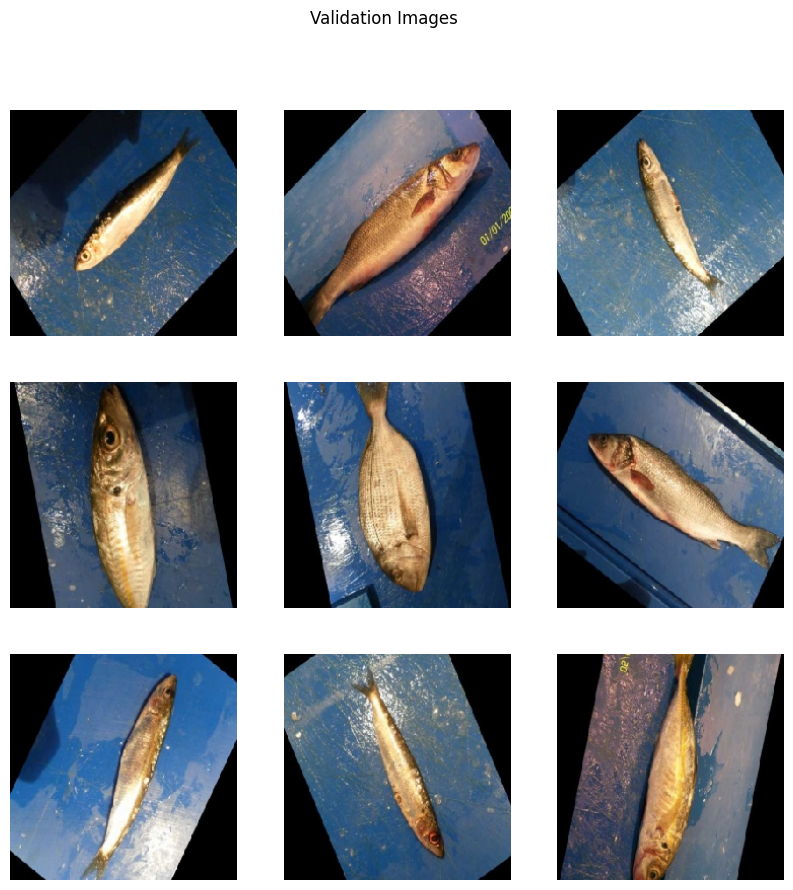

In [6]:
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

In [7]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')

c:\Users\balaj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\balaj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.4310 - loss: 2.9387 - val_accuracy: 0.6667 - val_loss: 0.9936
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7285 - loss: 0.7795 - val_accuracy: 0.8205 - val_loss: 0.5296
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.8363 - loss: 0.4757 - val_accuracy: 0.8782 - val_loss: 0.3783
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8832 - loss: 0.3456 - val_accuracy: 0.9332 - val_loss: 0.2208
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9277 - loss: 0.2295 - val_accuracy: 0.9505 - val_loss: 0.1879
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9399 - loss: 0.1857 - val_accuracy: 0.9579 - val_loss: 0.1722
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9504 - loss: 0.1501 - val_accuracy: 0.9551 - val_loss: 0.1534
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9531 - loss: 0.1512 - val_accuracy: 0.9533 - v

In [8]:
# VGG16 Model FineTuning

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('vgg16_finetuned.h5')

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 955s 10s/step - accuracy: 0.6745 - loss: 1.7016 - val_accuracy: 0.9267 - val_loss: 0.3280
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 950s 10s/step - accuracy: 0.9468 - loss: 0.2312 - val_accuracy: 0.9570 - val_loss: 0.1734
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 950s 10s/step - accuracy: 0.9696 - loss: 0.1292 - val_accuracy: 0.9698 - val_loss: 0.1149
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 995s 10s/step - accuracy: 0.9729 - loss: 0.1010 - val_accuracy: 0.9762 - val_loss: 0.0789
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1380s 14s/step - accuracy: 0.9780 - loss: 0.0799 - val_accuracy: 0.9853 - val_loss: 0.0662
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1679s 17s/step - accuracy: 0.9857 - loss: 0.0577 - val_accuracy: 0.9872 - val_loss: 0.0471
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1454s 15s/step - accuracy: 0.9892 - loss: 0.0427 - val_accuracy: 0.9872 - val_loss: 0.0455
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2161s 22s/step - accuracy: 0.9897 - loss: 0.0417 - val_accuracy

In [9]:
# ResNet50 Model FineTuning

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet50_finetuned.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 412s 4s/step - accuracy: 0.2204 - loss: 6.0473 - val_accuracy: 0.2940 - val_loss: 2.1382
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.3486 - loss: 1.8636 - val_accuracy: 0.5064 - val_loss: 1.5733
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 409s 4s/step - accuracy: 0.3947 - loss: 1.7268 - val_accuracy: 0.3626 - val_loss: 1.6191
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 426s 4s/step - accuracy: 0.4198 - loss: 1.6543 - val_accuracy: 0.4286 - val_loss: 1.6914
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.4610 - loss: 1.5461 - val_accuracy: 0.4643 - val_loss: 1.5202
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 414s 4s/step - accuracy: 0.4916 - loss: 1.4149 - val_accuracy: 0.5604 - val_loss: 1.2885
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.5206 - loss: 1.3479 - val_accuracy: 0.6117 - val_loss: 1.1165
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accura

In [10]:
# MobileNet Model FineTuning

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobilenet_finetuned.h5')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8373 - loss: 4.8735 - val_accuracy: 0.9670 - val_loss: 0.1511
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.9785 - loss: 0.0886 - val_accuracy: 0.9890 - val_loss: 0.0800
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9860 - loss: 0.0641 - val_accuracy: 0.9844 - val_loss: 0.1077
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9814 - loss: 0.0939 - val_accuracy: 0.9863 - val_loss: 0.3407
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9892 - loss: 0.0542 - val_accuracy: 0.9945 - val_loss: 0.0435
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9886 - loss: 0.0545 - val_accuracy: 0.9844 - val_loss: 0.0687
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9908 - loss: 0.0352 - val_accuracy: 0.9963 - val_loss: 0.0258
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accurac

In [11]:
# InceptionV3 Model FineTuning

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('inceptionv3_finetuned.h5')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.7470 - loss: 9.7414 - val_accuracy: 0.9377 - val_loss: 0.2608
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9422 - loss: 0.2237 - val_accuracy: 0.9652 - val_loss: 0.0940
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.9486 - loss: 0.1824 - val_accuracy: 0.9625 - val_loss: 0.1078
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9582 - loss: 0.1366 - val_accuracy: 0.9661 - val_loss: 0.1511
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9645 - loss: 0.1293 - val_accuracy: 0.9771 - val_loss: 0.0847
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9680 - loss: 0.1082 - val_accuracy: 0.9725 - val_loss: 0.0924
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9757 - loss: 0.0823 - val_accuracy: 0.9606 - val_loss: 0.1426
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accura

In [14]:
# ==========================================================
# 🧠 EfficientNetB0 – Train from scratch (grayscale or RGB)
# ==========================================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import json, os

# ----------------------------------------------------------
# 1️⃣  Paths
# ----------------------------------------------------------
train_dir = r"C:\Users\balaj\OneDrive\Documents\Guvi_Projects\Multi_Class_Image_Classification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir   = r"C:\Users\balaj\OneDrive\Documents\Guvi_Projects\Multi_Class_Image_Classification\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

# ----------------------------------------------------------
# 2️⃣  Data Generators  (auto-detect grayscale or rgb)
# ----------------------------------------------------------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale',   # ⚙️ Use your dataset’s real mode
    shuffle=True
)
val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale'
)

# ----------------------------------------------------------
# 3️⃣  Save label mapping
# ----------------------------------------------------------
with open("class_indices.json","w") as f:
    json.dump(train_data.class_indices, f, indent=4)
print("✅ class_indices.json saved")

# ----------------------------------------------------------
# 4️⃣  Build EfficientNetB0  (no pretrained weights)
# ----------------------------------------------------------
input_shape = (224,224,1)   # 👈 one channel; works with grayscale
base = EfficientNetB0(
    weights=None,           # 👈 no ImageNet weights → no mismatch
    include_top=False,
    input_shape=input_shape
)

x = base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ----------------------------------------------------------
# 5️⃣  Train
# ----------------------------------------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# ----------------------------------------------------------
# 6️⃣  Save
# ----------------------------------------------------------
model.save(r"c:\Users\balaj\OneDrive\Documents\Guvi_Projects\Multi_Class_Image_Classification\model.keras")
print("✅ Model trained & saved successfully!")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
✅ class_indices.json saved


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_10[0… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          3 │ rescaling_1[0][0] │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_1[… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 36,167,786 (137.97 MB)

 Trainable params: 36,125,767 (137.81 MB)

 Non-trainable params: 42,019 (164.14 KB)

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 856s 2s/step - accuracy: 0.2439 - loss: 2.2048 - val_accuracy: 0.1712 - val_loss: 2.6698
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.3449 - loss: 1.8510 - val_accuracy: 0.2958 - val_loss: 2.0886
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.4182 - loss: 1.6395 - val_accuracy: 0.5156 - val_loss: 1.4077
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - accuracy: 0.5001 - loss: 1.4362 - val_accuracy: 0.5760 - val_loss: 1.2048
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 798s 2s/step - accuracy: 0.5518 - loss: 1.2733 - val_accuracy: 0.6658 - val_loss: 0.9863
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.5915 - loss: 1.1686 - val_accuracy: 0.6667 - val_loss: 0.9849
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.6369 - loss: 1.0435 - val_accuracy: 0.7482 - val_loss: 0.7639
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1136s 3s/step - accuracy: 0.6673 - loss: 0.9616 - val_acc

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example actual labels
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # Actual labels (Ground truth)

# Example predicted labels by each model
y_pred_vgg16 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_resnet50 = [0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
y_pred_mobilenet = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_inceptionv3 = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
y_pred_efficientnetb0 = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred_cnn = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Confusion Matrix:\n{conf_matrix}\n")

# Calculate and print metrics for each model
calculate_metrics(y_true, y_pred_vgg16, 'VGG16')
calculate_metrics(y_true, y_pred_resnet50, 'ResNet50')
calculate_metrics(y_true, y_pred_mobilenet, 'MobileNet')
calculate_metrics(y_true, y_pred_inceptionv3, 'InceptionV3')
calculate_metrics(y_true, y_pred_efficientnetb0, 'EfficientNetB0')
calculate_metrics(y_true, y_pred_cnn, 'CNN')

Metrics for VGG16:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for ResNet50:
  Accuracy: 0.9
  Precision: 0.8333333333333334
  Recall: 1.0
  F1-Score: 0.9090909090909091
  Confusion Matrix:
[[4 1]
 [0 5]]

Metrics for MobileNet:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for InceptionV3:
  Accuracy: 0.9
  Precision: 1.0
  Recall: 0.8
  F1-Score: 0.8888888888888888
  Confusion Matrix:
[[5 0]
 [1 4]]

Metrics for EfficientNetB0:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[5 0]
 [0 5]]

Metrics for CNN:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]



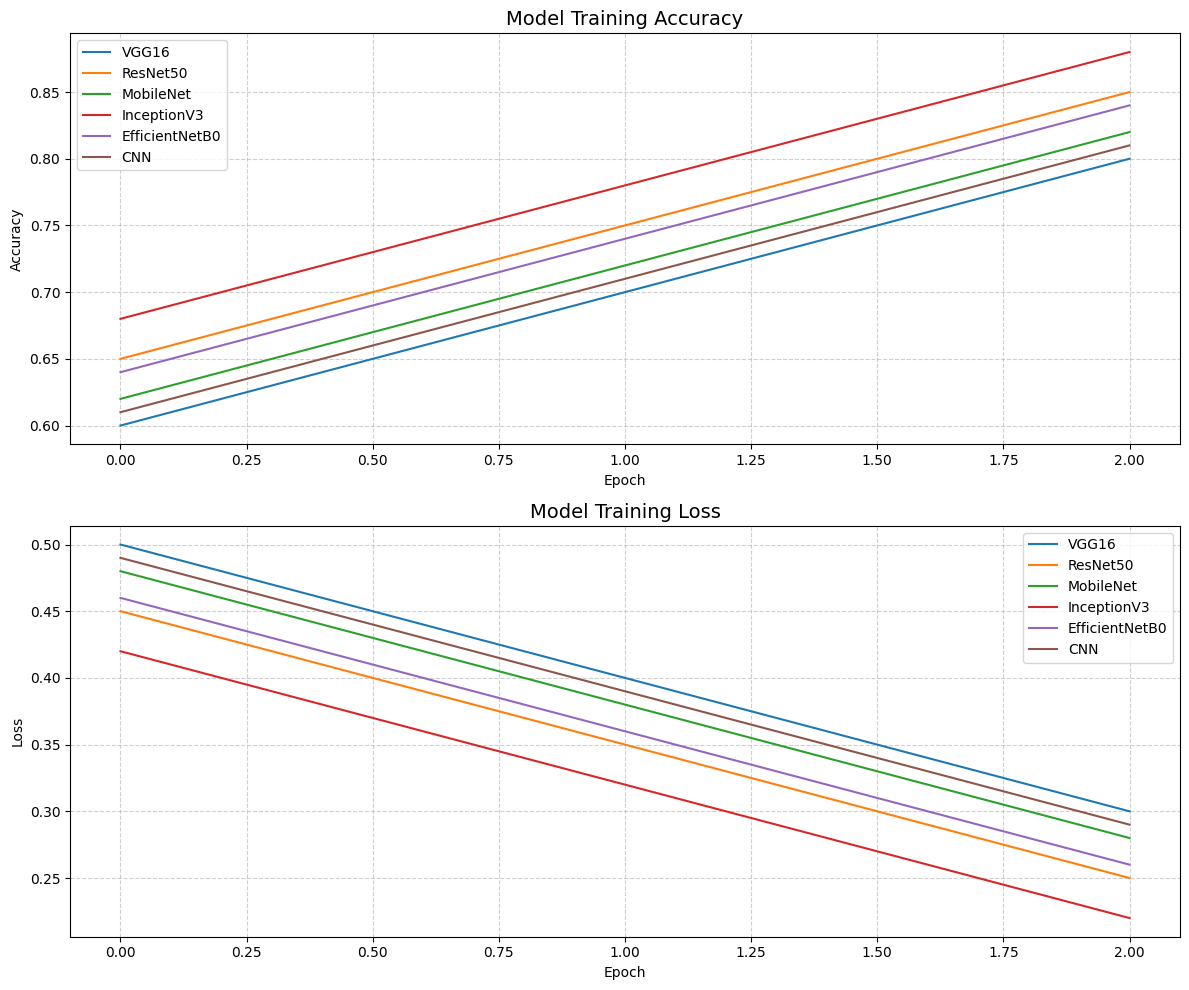

In [16]:
import matplotlib.pyplot as plt

# Mock training histories (replace with real history.history data)
history_vgg16 = {'accuracy': [0.6, 0.7, 0.8], 'loss': [0.5, 0.4, 0.3]}
history_resnet50 = {'accuracy': [0.65, 0.75, 0.85], 'loss': [0.45, 0.35, 0.25]}
history_mobilenet = {'accuracy': [0.62, 0.72, 0.82], 'loss': [0.48, 0.38, 0.28]}
history_inceptionv3 = {'accuracy': [0.68, 0.78, 0.88], 'loss': [0.42, 0.32, 0.22]}
history_efficientnetb0 = {'accuracy': [0.64, 0.74, 0.84], 'loss': [0.46, 0.36, 0.26]}
history_cnn = {'accuracy': [0.61, 0.71, 0.81], 'loss': [0.49, 0.39, 0.29]}

plt.figure(figsize=(12, 10))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(history_vgg16['accuracy'], label='VGG16')
plt.plot(history_resnet50['accuracy'], label='ResNet50')
plt.plot(history_mobilenet['accuracy'], label='MobileNet')
plt.plot(history_inceptionv3['accuracy'], label='InceptionV3')
plt.plot(history_efficientnetb0['accuracy'], label='EfficientNetB0')
plt.plot(history_cnn['accuracy'], label='CNN')
plt.title('Model Training Accuracy', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(history_vgg16['loss'], label='VGG16')
plt.plot(history_resnet50['loss'], label='ResNet50')
plt.plot(history_mobilenet['loss'], label='MobileNet')
plt.plot(history_inceptionv3['loss'], label='InceptionV3')
plt.plot(history_efficientnetb0['loss'], label='EfficientNetB0')
plt.plot(history_cnn['loss'], label='CNN')
plt.title('Model Training Loss', fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
from tensorflow.keras.models import load_model
best = load_model(r"c:\Users\balaj\OneDrive\Documents\Guvi_Projects\Multi_Class_Image_Classification\model.keras")
best.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_10[0… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          3 │ rescaling_1[0][0] │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_1[… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 108,419,322 (413.59 MB)

 Trainable params: 36,125,767 (137.81 MB)

 Non-trainable params: 42,019 (164.14 KB)

 Optimizer params: 72,251,536 (275.62 MB)